<a href="https://colab.research.google.com/github/mohsinziabutt/Applied-AI-Chellenge-1/blob/main/Test_1_assessment_1_CMP7229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/datasets assessment1.zip')

In [ ]:
# load data
import pandas as pd

#conver the Timestamp (GMT) to datetime
df = pd.read_csv('/content/datasets assessment1/PT_Train.csv', parse_dates=['Timestamp (GMT)'], index_col=['Timestamp (GMT)'])
df

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
Timestamp (GMT),,,,
2015-08-17 15:09:00,139,41,NaN,NaN
2015-08-17 15:10:00,144,40,92.0,140.0
2015-08-17 15:11:00,140,42,89.0,144.0
2015-08-17 15:12:00,138,45,93.0,141.0
2015-08-17 15:13:00,133,42,94.0,134.0
...,...,...,...,...
2015-08-17 18:50:00,159,51,NaN,NaN
2015-08-17 18:51:00,151,64,NaN,NaN
2015-08-17 18:52:00,140,64,NaN,NaN


In [ ]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [ ]:
#check for missing values of the dataset
print('\n'+('*'*35)+'The missing values of the dataset'+('*'*25))
print(df.isna().sum())

#check for missing values of the Lifetouch Heart Rate
print('\n'+f'The missing values of "Lifetouch Heart Rate" attribute: {df["Lifetouch Heart Rate"].isna().sum()}')



***********************************The missing values of the dataset*************************
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

The missing values of "Lifetouch Heart Rate" attribute: 0


In [ ]:
#Lifetouch_Heart_Rate = LHR
LHR = df[['Lifetouch Heart Rate']]
LHR

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
...,...
2015-08-17 18:50:00,159
2015-08-17 18:51:00,151
2015-08-17 18:52:00,140


In [ ]:
LHR.describe()

,Lifetouch Heart Rate
count,226.000000
mean,2315.615044
std,11351.588825
min,106.000000
25%,136.000000
50%,145.000000
75%,156.000000
max,61442.000000


In [ ]:
# As the discribtion illustrate we have some values for 'Heart Rate' attribute which are 61442
#identify the index of the values 1st way
high_values = LHR[LHR['Lifetouch Heart Rate'] > 250]

print('\n'+('*'*15)+'The values which are higher than 61442'+('*'*15))
print(high_values)

#identify the index of the values 2nd way
print('\n'+('*'*15)+'The values which are higher than 61442 (index)'+('*'*15))
outlier = []
for i in range(0, len(LHR['Lifetouch Heart Rate'])):
  if LHR['Lifetouch Heart Rate'][i] > 250:
    outlier.append(i)

print(f'The outliers index {outlier}')


***************The values which are higher than 61442***************
                     Lifetouch Heart Rate
Timestamp (GMT)                          
2015-08-17 15:39:00                 61441
2015-08-17 15:40:00                 61442
2015-08-17 15:41:00                 61441
2015-08-17 15:42:00                 61441
2015-08-17 15:43:00                 61441
2015-08-17 15:44:00                 61441
2015-08-17 15:45:00                 61442
2015-08-17 15:50:00                 61442

***************The values which are higher than 61442 (index)***************
The outliers index [30, 31, 32, 33, 34, 35, 36, 41]


In [ ]:
#drop the high values
LHR = LHR.drop(LHR[LHR['Lifetouch Heart Rate'] > 250].index)
LHR.describe()

,Lifetouch Heart Rate
count,218.000000
mean,145.862385
std,11.332404
min,106.000000
25%,136.000000
50%,142.500000
75%,155.000000
max,172.000000


In [ ]:
'''#conver the Timestamp (GMT) to datetime
LHR['Timestamp (GMT)'] = pd.to_datetime(LHR['Timestamp (GMT)'])
LHR.index = pd.to_datetime(LHR['Timestamp (GMT)'], format='%Y/%m/%d %H:%M')
del LHR['Timestamp (GMT)']'''

"#conver the Timestamp (GMT) to datetime\nLHR['Timestamp (GMT)'] = pd.to_datetime(LHR['Timestamp (GMT)'])\nLHR.index = pd.to_datetime(LHR['Timestamp (GMT)'], format='%Y/%m/%d %H:%M')\ndel LHR['Timestamp (GMT)']"

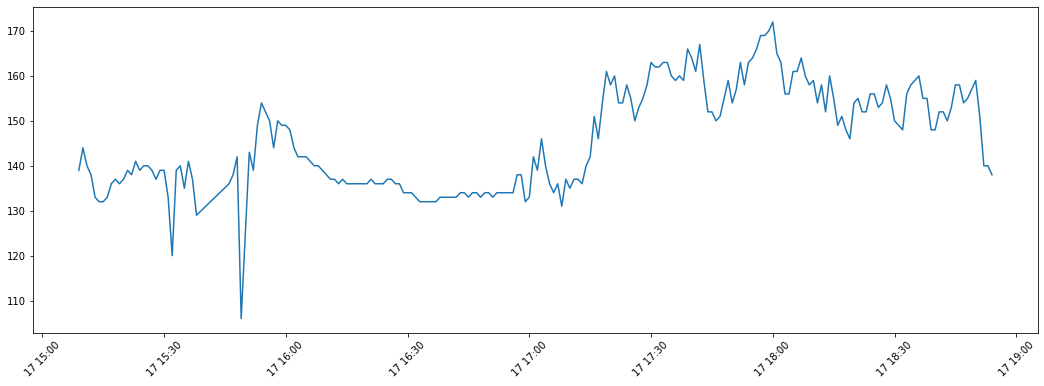

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(LHR)
plt.xticks(rotation=45)
plt.show()

**Hurst exponent:**

The value of H<0.5 shows anti-persistent behavior, and H>0.5 shows persistent behavior or a trending series. H=0.5 shows random walk/Brownian motion. The value of H<0.5, confirming that our series is stationary.

In [ ]:
#pip install hurst
#Check the stationarity of the time series
#Hurst exponent

import hurst
H, c,data = hurst.compute_Hc(LHR)
print("H = {:.4f}, c = {:.4f}".format(H,c))

H = 0.4362, c = 1.2232


**Augmented Dickey-Fuller (ADF):**

Compare the ADF Statistic with the critical values, a lower critical value tells us the series is most likely non-stationary. Next, we see the p-value. A p-value greater than 0.05 also suggests that the time series is non-stationary.

In [ ]:
#Check the stationarity of the time series
#Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller as adf
results = adf(LHR['Lifetouch Heart Rate'])

print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -2.360427
p-value: 0.153219
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


**KPSS test:**The series is non-stationary if the p-value is less than 0.05

In [ ]:
#KPSS test
from statsmodels.tsa.stattools import kpss
    
statistic, p_value, n_lags, critical_values = kpss(LHR['Lifetouch Heart Rate'])
    # Format Output
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')

print('Critial Values:')
for key, value in critical_values.items():
        print(f'   {key} : {value}')
        
print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

KPSS Statistic: 0.9218732210408906
p-value: 0.01
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
split = len(LHR) - int(0.2*len(LHR))
print(f'Use {split} samples for training')
print(f'Use {len(LHR) - split} samples for training')
train = LHR[0:split]
test = LHR[split:]

Use 175 samples for training
Use 43 samples for training


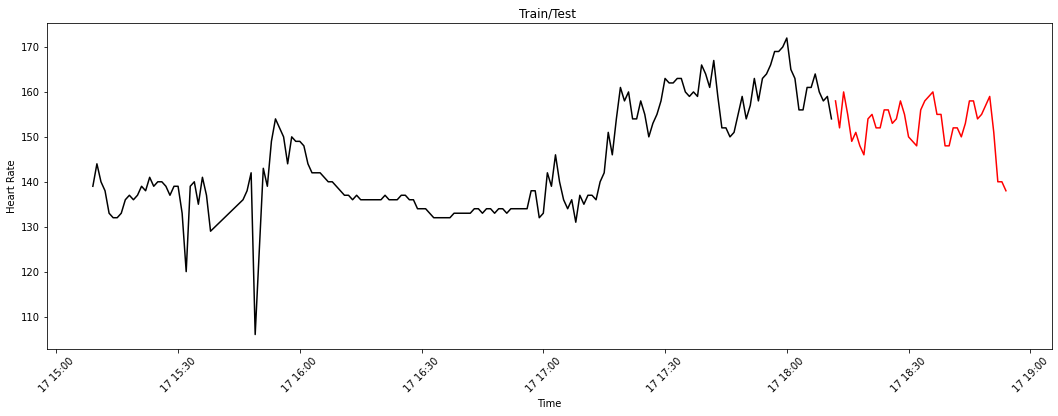

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot( train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.title("Train/Test ")
plt.show()

Since the  time series is not stationary arequires differencing to make it stationary, at least a difference order of 1(=d).

In [ ]:
#identify the p,d,q
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import mean_squared_error
import numpy as np

#Define the possible p,d,q
p, q = range(0,8), range(0,8)
d = range(0,4)
pdq_comp = list(itertools.product(p,d,q))

rmse= []
order = []
AIC = []
#Identify the optimal p,d,q with a for loop

for pdq in pdq_comp:
  try:
    X = train.values
    X = X.astype('float32')
    model_fit = ARIMA(X, order=pdq).fit(disp = -1)
    yhat = model_fit.predict(start = len(train), end = len(LHR)-1)
    error = np.sqrt(mean_squared_error(test, yhat))
    order.append(pdq)
    rmse.append(error)
    AIC.append(model_fit.aic)
  except:
        continue
       
		   
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/mod

In [ ]:
for i in range(0,len(rmse)):
  if AIC[i] == min(AIC):
    rmse_min, order_best, AIC_min = rmse [i], order[i], AIC[i]
    print('The optimal p,q,d:')
    print(rmse_min, order_best, AIC_min)

The optimal p,q,d:
152.642200553291 (4, 1, 5) 1043.5828710932135


In [ ]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
ARIMAmodel = ARIMA(train, order=order_best)  
ARIMAmodel_fit = ARIMAmodel.fit()  
print(ARIMAmodel_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                               ARIMA Model Results                                
Dep. Variable:     D.Lifetouch Heart Rate   No. Observations:                  174
Model:                     ARIMA(4, 1, 5)   Log Likelihood                -510.791
Method:                           css-mle   S.D. of innovations              4.433
Date:                    Sun, 30 Jan 2022   AIC                           1043.583
Time:                            17:29:25   BIC                           1078.332
Sample:                                 1   HQIC                          1057.679
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0984      0.191      0.514      0.608      -0.277       0.474
ar.L1.D.Lifetouch Heart Rate    -1.0565      

In [ ]:
# Forecast
forecast, standard_error, conf = ARIMAmodel_fit.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


#store the values in to a dataframe
data = {'Forecast': fc_series, 'lower_series':lower_series, 'upper_series':upper_series}
forecast_df = pd.DataFrame(data=data)


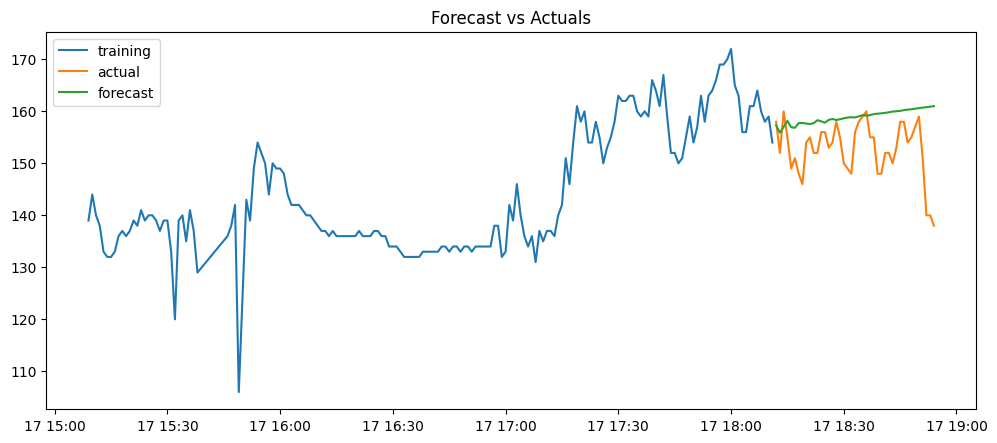

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
                 
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()